# Question 1

In [124]:
import pandas as pd
import numpy as np

In [66]:
users = pd.read_csv('ps31.txt', sep='|')

In [67]:
m = users.sort_values('occupation').loc[:,["age","occupation"]]

## mean age per occupation

In [111]:
Occup_avg_Age =  users.groupby(['occupation'],as_index=False).age.mean()

In [112]:
Occup_avg_Age

,occupation,age
0,administrator,38.746835
1,artist,31.392857
2,doctor,43.571429
3,educator,42.010526
4,engineer,36.388060
5,entertainment,29.222222
6,executive,38.718750
7,healthcare,41.562500
8,homemaker,32.571429
9,lawyer,36.750000


## Male ratio per occupation and sort it from the most to the least

In [107]:
males = users.loc[users.gender == "M", ("occupation","gender")]

In [117]:
males.groupby(["occupation"]).gender.count().sort_values(ascending = False)

occupation
student          136
other             69
educator          69
engineer          65
programmer        60
administrator     43
executive         29
scientist         28
technician        26
writer            26
librarian         22
marketing         16
entertainment     16
artist            15
retired           13
lawyer            10
salesman           9
doctor             7
none               5
healthcare         5
homemaker          1
Name: gender, dtype: int64

## Min age by occupaption

In [121]:
users.groupby(['occupation'],as_index=False).age.min()

,occupation,age
0,administrator,21
1,artist,19
2,doctor,28
3,educator,23
4,engineer,22
5,entertainment,15
6,executive,22
7,healthcare,22
8,homemaker,20
9,lawyer,21


## Max age by occupation

In [122]:
users.groupby(['occupation'],as_index=False).age.max()

,occupation,age
0,administrator,70
1,artist,48
2,doctor,64
3,educator,63
4,engineer,70
5,entertainment,50
6,executive,69
7,healthcare,62
8,homemaker,50
9,lawyer,53


## For each combination of occupation and sex, calculate the mean age

In [123]:
users.groupby(['occupation','gender'],as_index=False).age.mean()

,occupation,gender,age
0,administrator,F,40.638889
1,administrator,M,37.162791
2,artist,F,30.307692
3,artist,M,32.333333
4,doctor,M,43.571429
5,educator,F,39.115385
6,educator,M,43.101449
7,engineer,F,29.500000
8,engineer,M,36.600000
9,entertainment,F,31.000000


##  For each occupation present the percentage of women and men


In [139]:
occup_gender = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})

occup_count = users.groupby(['occupation']).agg('count')

perc_occup_gender = gender_ocup.div(occup_count, level = "occupation") * 100

perc_occup_gender.loc[: , 'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

# Question 2

In [140]:
import pandas as pd
import numpy as np

In [72]:
euro12 = pd.read_csv('euro.txt',sep = ",")

In [142]:
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


## Select only the Goal column

In [158]:
euro12[["Goals"]]

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


## How many team participated in the Euro2012?

In [150]:
euro12.Team.count()

16

## What is the number of columns in the dataset?

In [151]:
len(euro12.columns)

35

## View only the columns Team, Yellow Cards and Red Cards and assign them
## to a dataframe called discipline

In [157]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


## Sort the teams by Red Cards, then to Yellow Cards

In [163]:
sort_by_yellow_team = euro12.sort_values(by = 'Yellow Cards',ascending=False)
sort_by_red_team = sort_by_yellow_team.sort_values(by = 'Red Cards',ascending=False)
sort_by_red_team

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17
11,Republic of Ireland,1,7,12,36.8%,5.2%,28,0,0,0,...,17,65.4%,43,51,11,6,1,10,10,17
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
10,Portugal,6,22,42,34.3%,9.3%,82,6,0,0,...,10,71.5%,73,90,10,12,0,14,14,16
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
14,Sweden,5,17,19,47.2%,13.8%,39,3,0,0,...,8,61.6%,35,51,7,7,0,9,9,18
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


##  Calculate the mean Yellow Cards given per Team

In [165]:
euro12["Yellow Cards"].mean()

7.4375

## Filter teams that scored more than 6 goals


In [167]:
euro12[["Team","Goals"]].query("Goals > 6")

,Team,Goals
5,Germany,10
13,Spain,12


##  Select the teams that start with G


In [211]:
names = [team for team in euro12[["Team"]].values if team[0][0] == "G"]
print(names)

[array(['Germany'], dtype=object), array(['Greece'], dtype=object)]


## Select the first 7 columns

In [190]:
euro12.iloc[:,0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


## Select all columns except the last 3

In [191]:
euro12.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


## Present only the Shooting Accuracy from England, Italy and Russia

In [198]:
euro12[["Team","Shooting Accuracy"]].query("Team == 'England' or Team == 'Italy' or Team == 'Russia'")

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3

In [1]:
import pandas as pd
import numpy as np

### Create 3 differents Series, each of length 100, as follows:
### The first a random number from 1 to 4
### The second a random number from 1 to 3
### The third a random number from 10,000 to 30,000

In [27]:
s1 = pd.Series(np.random.randint(1,5,size=(100)))
s1

0     3
1     4
2     4
3     2
4     1
     ..
95    1
96    3
97    3
98    2
99    3
Length: 100, dtype: int32

In [28]:
s2 = pd.Series(np.random.randint(1,4,size=(100)))
s2

0     2
1     1
2     3
3     3
4     3
     ..
95    2
96    2
97    3
98    2
99    1
Length: 100, dtype: int32

In [29]:
s3 = pd.Series(np.random.randint(10000,30001,size=(100)))
s3

0     21734
1     18902
2     12071
3     24303
4     15711
      ...  
95    21989
96    17603
97    24856
98    24023
99    26824
Length: 100, dtype: int32

## Create a DataFrame by joinning the Series by column

In [68]:
df = pd.concat([s1, s2, s3], axis=1)
df

,0,1,2
0,3,2,21734
1,4,1,18902
2,4,3,12071
3,2,3,24303
4,1,3,15711
...,...,...,...
95,1,2,21989
96,3,2,17603
97,3,3,24856
98,2,2,24023


## Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [69]:
df.rename(columns={0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter' }, inplace=True)
df

,bedrs,bathrs,price_sqr_meter
0,3,2,21734
1,4,1,18902
2,4,3,12071
3,2,3,24303
4,1,3,15711
...,...,...,...
95,1,2,21989
96,3,2,17603
97,3,3,24856
98,2,2,24023


## Create a one column DataFrame with the values of the 3 Series and assign it
## to 'bigcolumn'

In [70]:
bigcolumn = pd.concat([s1+s2+s3] , axis = 1)
type(bigcolumn)

pandas.core.frame.DataFrame

### Ops it seems it is going only until index 99. Is it true?

### YES

## Reindex the DataFrame so it goes from 0 to 299


In [56]:
l = []
for i in range(300):
    l.append(i)

In [57]:
bigcolumn.reindex(l)

,0
0,21739.0
1,18907.0
2,12078.0
3,24308.0
4,15715.0
...,...
295,NaN
296,NaN
297,NaN
298,NaN


# Question 4

In [90]:
import pandas as pd
import numpy as np

##  Assign it to a variable called data and replace the first 3 columns by a proper
## datetime index.

In [106]:
data = pd.read_csv("wind.txt", sep = "\s+|\t+|\s+\t+|\t+\s+")

C:\Users\rohit\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [107]:
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [108]:
data["Date"] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data = data.drop(columns=["Yr","Mo","Dy"])
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05


## Year 2061? Do we really have data from this year? Create a function to fix it
## and apply it.


In [112]:
data["Date"] = np.where(pd.DatetimeIndex(data["Date"]).year < 2000,data.Date,data.Date - pd.offsets.DateOffset(years=100))

In [113]:
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,1978-12-27
6570,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,1978-12-28
6571,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,1978-12-29
6572,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,1978-12-30


## Set the right dates as the index. Pay attention at the data type, it should be
## datetime64[ns].

In [114]:
data = data.set_index("Date")
data.index.astype("datetime64[ns]")

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

## Compute how many values are missing for each location over the entire
## record.They should be ignored in all calculations below

In [117]:
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

## Compute how many non-missing values there are in total.

In [118]:
data.notnull().values.ravel().sum()

78857

## Calculate the mean windspeeds of the windspeeds over all the locations and
## all the times.


In [125]:
x = data.mean()
y = x.mean()
print("Mean of means :")
y

Mean of means :


10.227982360836924

## Create a DataFrame called loc_stats and calculate the min, max and mean
## windspeeds and standard deviations of the windspeeds at each location over all the
## days
## A different set of numbers for each location.

In [133]:
def statistics(col):
    
    s = pd.Series(col)
    col_min = s.min()
    col_max = s.max()
    col_mean = s.mean()
    col_std = s.std()
    stat = pd.Series([col_min,col_max,col_mean,col_std], ["Min","Max","Mean","StdDev"])
    return stat

loc_stats = data.apply(statistics)
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
Max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
Mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
StdDev,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


## Create a DataFrame called day_stats and calculate the min, max and mean
## windspeed and standard deviations of the windspeeds across all the locations at each
## day

In [138]:
day_stats = data.apply(statistics,axis=1)
day_stats

,Min,Max,Mean,StdDev
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


## Find the average windspeed in January for each location.
## Treat January 1961 and January 1962 both as January.


In [147]:
jan_avg_windspeed = data[data.index.month == 1]
jan_avg_windspeed.mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

## Downsample the record to a yearly frequency for each location.

In [148]:
data.resample('Y').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


## Downsample the record to a monthly frequency for each location.

In [149]:
data.resample('M').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


## Downsample the record to a weekly frequency for each location.

In [150]:
data.resample('W').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


## Calculate the min, max and mean windspeeds and standard deviations of the
## windspeeds across all locations for each week (assume that the first week starts on
## January 2 1961) for the first 52 weeks.

# Question 5

In [156]:
import pandas as pd
import numpy as np

In [157]:
chipo = pd.read_csv("items.txt", sep = "	")

In [158]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


## See the first 10 entries

In [159]:
chipo.iloc[:10,:]

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


## What is the number of observations in the dataset?

In [160]:
len(chipo)

4622

## What is the number of columns in the dataset?

In [162]:
len(chipo.columns)

5

## Print the name of all the columns.

In [166]:
for col in chipo.columns:
    print(col)

order_id
quantity
item_name
choice_description
item_price


## How is the dataset indexed?

In [260]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

## Which was the most-ordered item?

In [259]:
number_ordered_items = chipo.groupby("item_name").agg({'quantity':'sum'}).sort_values(by='quantity', ascending=False)
most_ordered_item = number_ordered_items[:1]
most_ordered_item

,quantity
item_name,
Chicken Bowl,761


## For the most-ordered item, how many items were ordered?

In [253]:
print(most_ordered_item[["quantity"]])

              quantity
item_name             
Chicken Bowl       761


## What was the most ordered item in the choice_description column?

In [262]:
chipo.groupby("choice_description").agg({'quantity':'sum'}).sort_values('quantity',ascending=False).head(1)

,quantity
choice_description,
[Diet Coke],159


##  How many items were orderd in total?

In [264]:
chipo.item_name.count()

4622

## Turn the item price into a float
## Check the item price type
## Create a lambda function and change the type of item price
## Check the item price type


In [268]:
chipo.item_price.dtype

dtype('O')

In [272]:
fn = lambda price : float(price[1:-1])
item_price = chipo.item_price.apply(fn)

In [273]:
item_price.dtype

dtype('float64')

##  How much was the revenue for the period in the dataset?

In [276]:
(item_price*chipo.quantity).sum()

39237.02

## How many orders were made in the period?

In [280]:
chipo.order_id.value_counts().count()

1834

## What is the average revenue amount per order?

In [287]:
chipo['revenue'] = chipo['quantity'] * item_price

In [294]:
avg_per_order = chipo.groupby(by=['order_id']).sum()

In [293]:
avg_per_order['revenue'].mean()

21.394231188658654

## How many different items are sold?

In [296]:
chipo.item_name.value_counts().count()

50

# Question 6

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
data = pd.read_csv("us-marriages-divorces-1867-2014.csv")

In [16]:
columns = ["Marriages_per_1000","Divorces_per_1000"]

Text(0, 0.5, 'Number of marriages & divorces per capita')

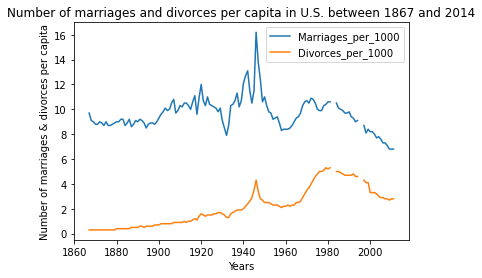

In [23]:
x_data = data['Year'].values
fig ,ax = plt.subplots()

for col in columns:
    ax.plot(x_data,data[col].values)

ax.set_title("Number of marriages and divorces per capita in U.S. between 1867 and 2014")
ax.legend(columns)

plt.xlabel("Years")
plt.ylabel("Number of marriages & divorces per capita")

# Question 7

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [24]:
ver_data = data[data["Year"].apply(lambda x : x in [1900,1950,2000])]

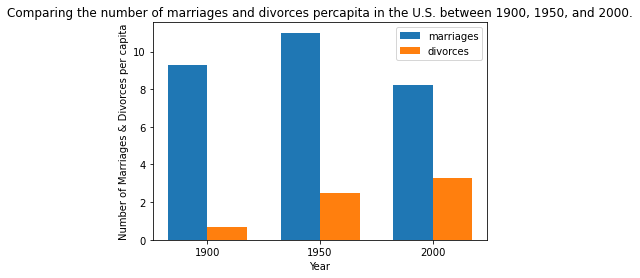

In [81]:
labels = ver_data['Year'].tolist()
marriages = ver_data['Marriages_per_1000'].tolist()
divorces = ver_data['Divorces_per_1000'].tolist()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, marriages, width, label='marriages')
bars2 = ax.bar(x + width/2, divorces, width, label='divorces')

ax.set_ylabel('Number of Marriages & Divorces per capita')
ax.set_xlabel('Year')
ax.set_title('Comparing the number of marriages and divorces percapita in the U.S. between 1900, 1950, and 2000.')
ax.legend()

plt.xticks(x, labels)

plt.show()

# Question 8

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [109]:
data = pd.read_csv("actor_kill_counts.csv")

In [111]:
data = data.sort_values("Count", ascending=False)
data

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
7,Sylvester Stallone,267
4,Dolph Lundgren,239
8,Tomisaburo Wakayama,226
2,Clint Eastwood,207
6,Nicolas Cage,204
5,Jet Li,201
3,Clive Owen,194
9,Wesley Snipes,193


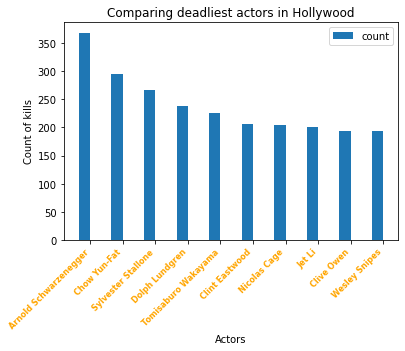

In [123]:
labels = data['Actor'].tolist()
count = data['Count'].tolist()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, count, width, label='count')

ax.set_ylabel('Count of kills')
ax.set_xlabel('Actors')
ax.set_title('Comparing deadliest actors in Hollywood')
ax.legend()

plt.xticks(x, labels, color='orange', rotation=45, fontweight='bold', fontsize='8', horizontalalignment='right')

plt.show()

# Question 9

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected = True)
import plotly.graph_objs as go

In [184]:
data = pd.read_csv("roman-emperor-reigns.csv")
data

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


In [185]:
x = data['Cause_of_Death'].value_counts()

In [186]:
causes = x.index.values.tolist()
number = x.tolist()
total_deaths = sum(number)

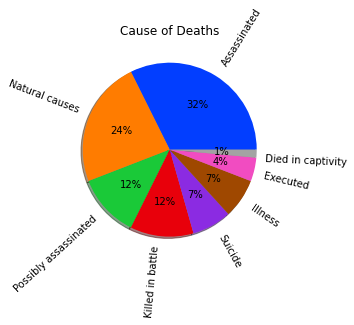

In [200]:
colors = sb.color_palette('bright')

plt.pie(number, labels=causes, colors=colors,
        autopct='%.0f%%', shadow=True, rotatelabels='true')

plt.title("Cause of Deaths")
plt.show()

In [220]:
fig = {
    
    "data":[
        {
            "values" : number,
            "labels" : causes,
            "domain" : {"x":[.2, .5]},
            "name" : "Cause of deaths",
            "hoverinfo" : "label+percent+name",
            "hole" : .3,
            "type" : "pie"
            
        },],
    
    "layout" : 
        {
            "title" : "Cause of deaths of Roman Emperors",
            "annotations" : [
                {
                    "font" : {"size" : 20},
                    "showarrow" : False,
                    "text" : "Cause of Deaths",
                    "x" : 0.2,
                    "y" : 1
                },
            ]
        }
    
    
    
}

iplot(fig)

# Question 10

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected = True)
import plotly.graph_objs as go

In [213]:
data = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")

In [214]:
data

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


In [215]:
x1 = data['Total Arcade Revenue (billions)'].tolist()
x2 = data['Computer Science Doctorates Awarded (US)'].tolist()
y = data['Year'].tolist()

In [219]:
fig = make_subplots(specs=[[{"secondary_y": True}]])


fig.add_trace(
    go.Scatter(x=y, y=x1, mode = "markers", name="Total Arcade Revenue (billions)"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=y, y=x2, mode = "markers", name="Computer Science Doctorates Awarded (US)"),
     secondary_y=True,
)


fig.update_layout(
    title_text="total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S"
)


fig.update_xaxes(title_text="Year")


fig.update_yaxes(title_text="Total Arcade Revenue (billions)", secondary_y=False)
fig.update_yaxes(title_text="Computer Science Doctorates Awarded (US)", secondary_y=True)

fig.show()